In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
DF = pd.read_csv('test-result.txt',delimiter='\t', index_col=[0,1])
def to_df(colname):
    col = np.array(DF[colname])
    return pd.DataFrame(np.reshape(col,(5,col.shape[0]/5)), columns=["D-P-L","D-NP-L","ND-NP-L","ND-P-L","D-P-E","D-NP-E"],index=["Range: Reg\nSlide: Reg","Range: Lo\nSlide: Reg","Range: Hi\nSlide: Reg","Range: Reg\nSlide: Lo","Range: Reg\nSlide: Hi"])
time = to_df('TIME')
agg = to_df('AGG')
red = to_df('RED')
upd = to_df('UPD')


In [70]:
def plot_bar(df,main, filename = None, columns = None,  ylim = None):  
    if columns:
        ax = df[columns].plot(kind='bar',figsize=(12, 8), width = 0.7)
    else:    
        ax = df.plot(kind='bar',figsize=(12, 8), width = 0.7)
    plt.xticks(rotation=0)
    plt.xlabel('Scenario', fontsize = 14)
    if ylim:
        plt.ylim(ylim)
    plt.yscale('log')
    plt.legend(ncol = 3)
    plt.title(main, fontsize = 14)
    if filename:
        plt.savefig(filename)
    

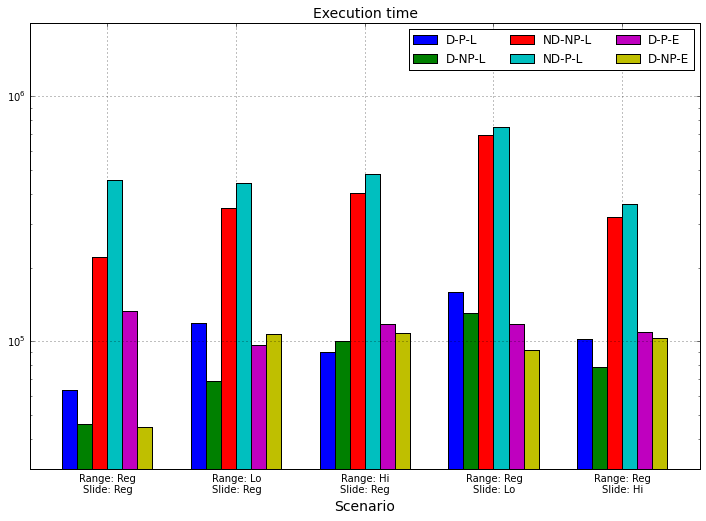

In [46]:
plot_bar(time,'Execution time' ,ylim = (3E4,2E6))

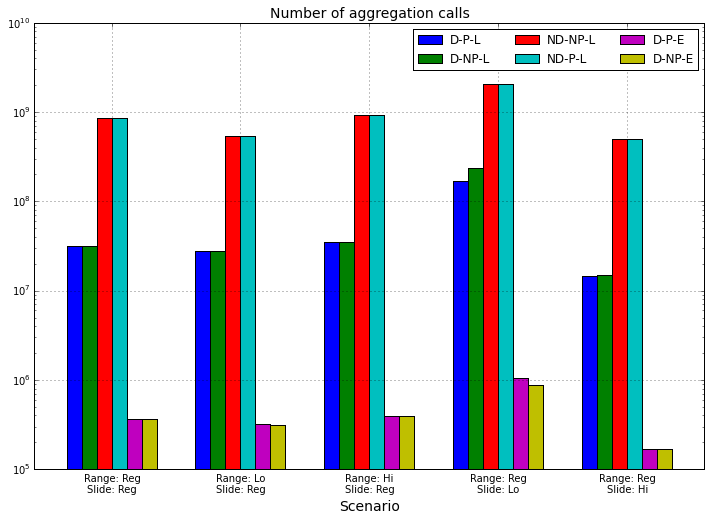

In [49]:
plot_bar(agg,'Number of aggregation calls')

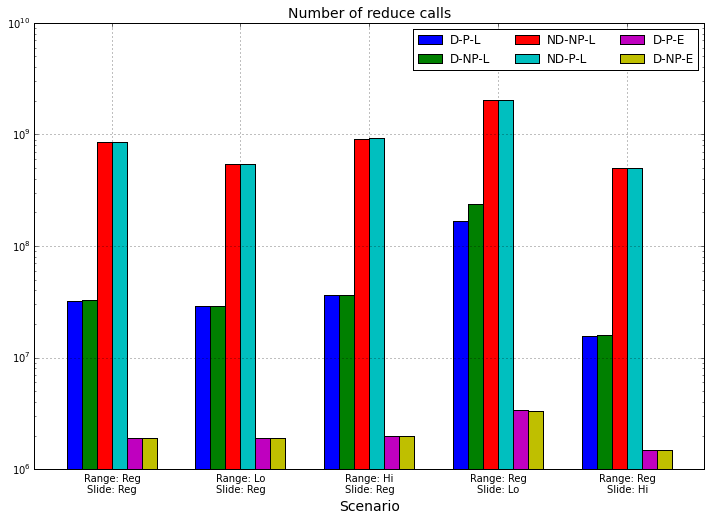

In [48]:
plot_bar(red,'Number of reduce calls')

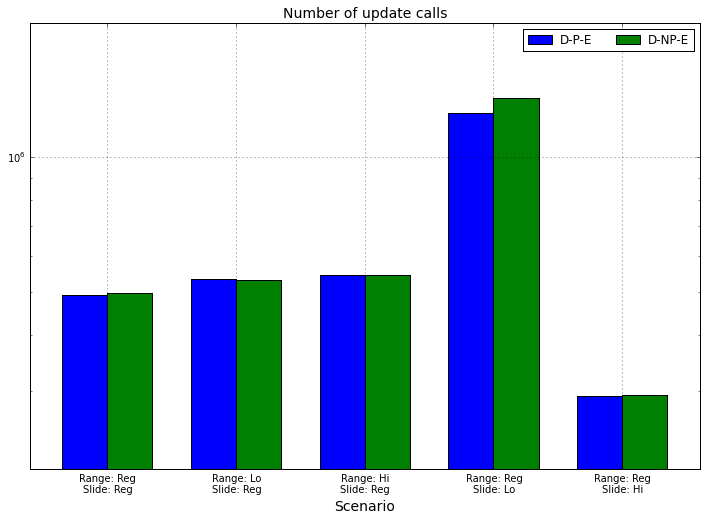

In [73]:
plot_bar(upd,'Number of update calls', columns = ['D-P-E','D-NP-E'], ylim = (2E5,2E6))